In [29]:
from tensorflow.keras.datasets import mnist
from keras.layers import Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(x_train,_),(x_test,_)= mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [42]:
x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)

In [34]:
print(f"shape of train {x_train.shape}")
print(f"shape of test {x_test.shape}")

shape of train (60000, 28, 28, 1)
shape of test (10000, 28, 28, 1)


In [35]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor*np.random.normal(loc=0.0 , scale = 1.0 , size = x_train.shape)
x_test_noisy = x_test + noise_factor*np.random.normal(loc=0.0 , scale = 1.0 , size = x_test.shape)

In [43]:
x_train_noisy = np.clip(x_train_noisy , 0. , 1.)
x_test_noisy = np.clip(x_test_noisy , 0. , 1.)

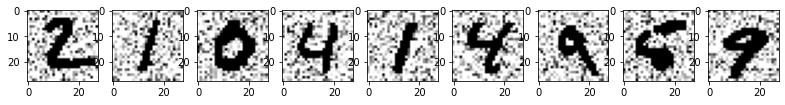

In [37]:
plt.figure(figsize=(15,10))
for i in range(1,10):
  ax = plt.subplot(1,10,i)
  plt.imshow(x_test_noisy[i].reshape(28,28) , cmap='binary')
plt.show()

In [28]:
x_test.shape

(10000, 28, 28, 1)

In [47]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , activation='relu' , padding='same' , input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2) , padding='same'))
model.add(Conv2D(8 , (3,3) , activation='relu' , padding='same'))
model.add(MaxPooling2D((2,2) , padding='same'))
model.add(Conv2D(8 , (3,3) , activation='relu' , padding='same'))
model.add(MaxPooling2D((2,2) , padding='same'))

model.add(Conv2D(8 , (3,3) , activation='relu' , padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(8 , (3,3) , activation='relu' , padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32 , (3,3) , activation='relu'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(1 , (3,3) , activation='relu' , padding='same'))

In [48]:
model.compile(optimizer='adam' , loss='mean_squared_error')

In [49]:
history = model.fit(x_train_noisy,x_train , validation_data = (x_test_noisy,x_test) , epochs=20 , batch_size=256)

Epoch 1/20
235/235 [==============================] - 16s 14ms/step - loss: 4369.2256 - val_loss: 3058.1450
Epoch 2/20
235/235 [==============================] - 3s 12ms/step - loss: 2677.7693 - val_loss: 2384.0410
Epoch 3/20
235/235 [==============================] - 2s 10ms/step - loss: 2265.6528 - val_loss: 2113.1428
Epoch 4/20
235/235 [==============================] - 2s 10ms/step - loss: 2034.4750 - val_loss: 1910.4417
Epoch 5/20
235/235 [==============================] - 3s 11ms/step - loss: 1859.0134 - val_loss: 1765.3916
Epoch 6/20
235/235 [==============================] - 3s 11ms/step - loss: 1733.7731 - val_loss: 1712.3964
Epoch 7/20
235/235 [==============================] - 2s 10ms/step - loss: 1644.1737 - val_loss: 1638.6284
Epoch 8/20
235/235 [==============================] - 2s 10ms/step - loss: 1579.3613 - val_loss: 1534.3208
Epoch 9/20
235/235 [==============================] - 2s 10ms/step - loss: 1523.5632 - val_loss: 1484.8621
Epoch 10/20
235/235 [===============

In [51]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 4, 8)         

In [50]:
no_noise_image = model.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


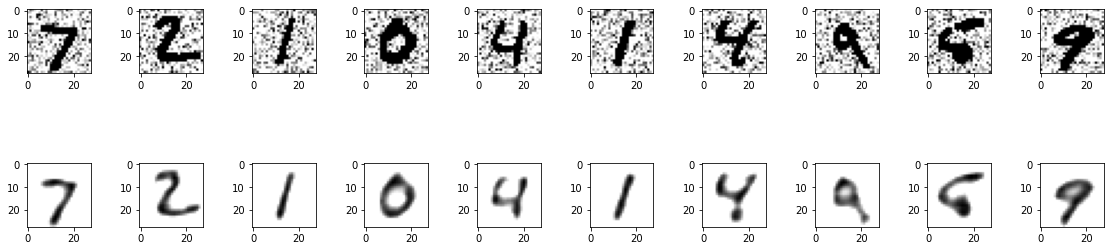

In [52]:
plt.figure(figsize=(40,4))
for i in range(10):
  ax = plt.subplot(3,20,i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28),cmap='binary')
  ax = plt.subplot(3,20,40+i+1)
  plt.imshow(no_noise_image[i].reshape(28,28),cmap='binary')
plt.show()